# Boston House Price

1. 利用python的sklearn库（线性回归，lasso回归，岭回归，弹性网络算法）对给定数据集进行预测分析。
2. 分析线性回归算法的实现流程
3. 分析代价函数的构造、梯度下降的实现、回归算法的构建过程；
4. 根据算法描述编程实现算法，调试运行；
5. 对所给数据集进行验算，得到分析结果。

## 导入Jupyterthemes(画图)

In [1]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

## 导入Python模块

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets

#机器分类算法模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

#切割训练数据和样本数据
from sklearn.model_selection import train_test_split

#用于模型评分
from sklearn.metrics import r2_score

## 加载波士顿房价数据

In [3]:
boston = datasets.load_boston()
train = boston.data
target = boston.target
boston_pd = pd.DataFrame(train, columns=boston.feature_names)
boston_pd['PRICE'] = target # 增加target这一列，作为Price

## 分析数据

In [4]:
boston_pd.head()
# CRIM    城镇人均犯罪率
# ZN    住宅用地所占面积
# INDUS    城镇中非商业用地所占面积
# CHAS    是否毗邻查尔斯河
# NOX    环保指标
# RM    每栋住宅的房间数
# AGE    1940年建成的自助单位的比例
# DIS    距离波士顿就业中心的距离
# RAD    距离高速公路的便利指数
# TAX    每一万美元的不动产率
# PTRATIO    城镇中教师学生比例
# B    黑人的比例
# LSTAT    地区中有多少百分比的房东属于低收入阶层
# MEDV 自助房屋房价中位数

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print "Boston housing dataset has {} data points with {} variables each.".format(*boston_pd.shape)

Boston housing dataset has 506 data points with 14 variables each.


> 数据有506个样本 14-1=13个特征

In [6]:
#计算价值的最小值
minimum_price = np.min(boston_pd['PRICE'])

#计算价值的最大值
maximum_price = np.max(boston_pd['PRICE'])

#计算价值的平均值
mean_price = np.mean(boston_pd['PRICE'])

#计算价值的中值
median_price = np.median(boston_pd['PRICE'])

#计算价值的标准差
std_price = np.std(boston_pd['PRICE'])

#输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


> 最低房价: 5.00
最高房价: 50.00
平均数: 22.53
中位数 21.20
标准差: 9.19

## 可视化部分特征与Lable的关系

### 1. 住宅房间数(RM)与房价的关系

Text(0,0.5,'PRICE')

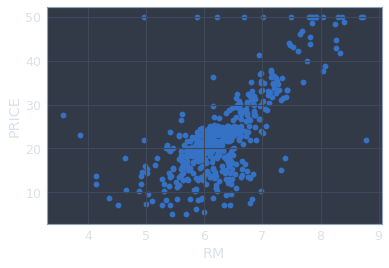

In [7]:
plt.scatter(boston_pd.RM, boston_pd.PRICE)
plt.xlabel('RM')
plt.ylabel('PRICE')

> 除了一些少数的异常值(outlier)外，房价和房间数基本上呈线性关系。

> 试着去掉一些异常值：

In [8]:
# 去异常值
def reject_outliers(boston_pd):
    u = np.mean(boston_pd.PRICE)
    s = np.std(boston_pd.PRICE)
    data_filtered = boston_pd[(boston_pd.PRICE > u-2*s) & (boston_pd.PRICE < u+2*s) &
                             (boston_pd.RM < 7.2) & (boston_pd.RM > 4.5)]
    return data_filtered
boston_cleaned = reject_outliers(boston_pd)

Text(0,0.5,'PRICE')

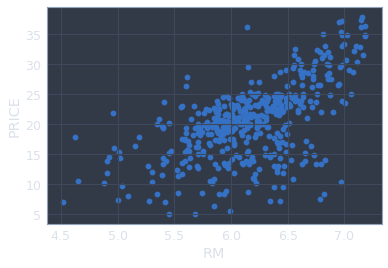

In [9]:
plt.scatter(boston_cleaned.RM, boston_cleaned.PRICE)
plt.xlabel('RM')
plt.ylabel('PRICE')

### 2. 犯罪率(CRIM)与房价关系

Text(0,0.5,'PRICE')

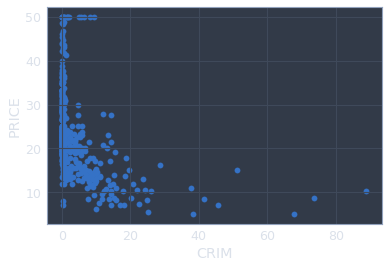

In [10]:
plt.scatter(boston_pd.CRIM, boston_pd.PRICE)
plt.xlabel('CRIM')
plt.ylabel('PRICE')

> 从散点图可以直观的看出：犯罪率越低，地方越安全，房价越高

### 3. CHAS(Charles River)与房价关系

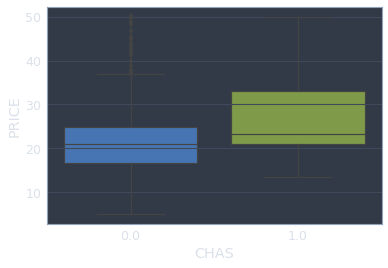

In [11]:
import seaborn as sns
sns.boxplot(data=boston_pd, x='CHAS', y='PRICE')

> 箱线图主要包含六个数据节点，将一组数据从大到小排列，分别计算出他的上边缘，上四分位数Q3，中位数Q2，下四分位数Q1，下边缘，还有一个异常值。主要从中位数的偏向来看分布的偏向，从上四分位与下四分位的距离越小说明越集中，否则说明越分散，同理对于上边缘和下边缘。

> 从箱线图可以直观的看出：湖景房（右）跟非湖景房（左）比平均价格高不少

### 3. 接下来看看其他因素的影响——挑出10所最贵的房子

In [12]:
# 10所最贵房子
TOP_10 = boston_pd.sort_values(by='PRICE', ascending=False)[:10]
TOP_10

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1.0,0.6310,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0.0,0.6310,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1.0,0.6680,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0


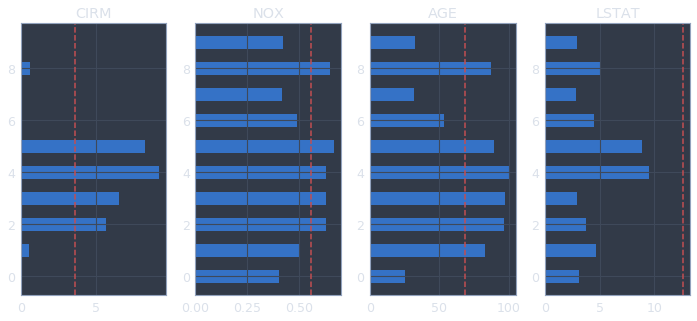

In [13]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(141)
plt.title('CIRM')
plt.barh(np.arange(10), TOP_10.CRIM, height=0.5)
plt.axvline(x=boston_pd.CRIM.mean(), color='r', ls='--', lw=1.5)

ax1 = fig.add_subplot(142)
plt.title('NOX')
plt.barh(np.arange(10), TOP_10.NOX, height=0.5)
plt.axvline(x=boston_pd.NOX.mean(), color='r', ls='--', lw=1.5)

ax1 = fig.add_subplot(143)
plt.title('AGE')
plt.barh(np.arange(10), TOP_10.AGE, height=0.5)
plt.axvline(x=boston_pd.AGE.mean(), color='r', ls='--', lw=1.5)

ax1 = fig.add_subplot(144)
plt.title('LSTAT')
plt.barh(np.arange(10), TOP_10.LSTAT, height=0.5)
plt.axvline(x=boston_pd.LSTAT.mean(), color='r', ls='--', lw=1.5)

> 说到这个犯罪率，看样子不怕贼偷，就怕贼惦记啊，可能就盗窃案还真可能富人区发生的概率更高，毕竟随手顺走点东西搞不好就是值钱货；

> 而作为氮氧化污染物，若是一个城市整体的空气质量不佳，钱再多装啥新风系统也作用不是很大，看起来的确保护环境人人有责；

> 而房龄这个因素，发现高房价区域很大部分房龄超过50年了（哥，拆迁办不给力啊）；

> 最后一个因素低收入人群比例这个区域远远低于平均数，说明一个问题：能买得起房子的都是有钱人，特别是贵的房子。这不是废话吗23333

## 纯python实现一元线性回归(房价与房间数)

一元线性回归算法即为：$y=mx+b$。损失函数$Loss=\sum_{i=1}^{N}(y_i-(mx_i+b))^2$。为了使损失函数最小，故采用梯度下降法寻找更优的m和b值,直至收敛！

$$\frac{\partial Loss}{\partial m}=\frac{\frac{1}{N}\sum_{i=1}^{N}(y_i-(mx_i+b))^2}{\partial m}=-\frac{2}{N}\sum_{i=1}^{N}x_i(y_i-(mx_i+b))$$

$$\frac{\partial Loss}{\partial b}=\frac{\frac{1}{N}\sum_{i=1}^{N}(y_i-(mx_i+b))^2}{\partial b}=-\frac{2}{N}\sum_{i=1}^{N}(y_i-(mx_i+b))$$

$$m_{new}=m+\frac{\partial Loss}{\partial m}$$

$$b_{new}=b+\frac{\partial Loss}{\partial m}$$

> 这里用了加号，很多人会误以为梯度下降就要减，但是其实梯度本身是有方向的，所以这里直接加就可以。

## 上代码(纯python实现)：

In [14]:
x = np.array(boston_cleaned.RM)

In [15]:
y = np.array(boston_cleaned.PRICE)

initial variables:
 initial_b = 0.0
 intial_m = 0.0
 error of begin = 456.767817372 

iter 0:error=392.62947688
iter 100:error=30.6749245928
iter 200:error=30.6637605557
iter 300:error=30.6526527762
iter 400:error=30.6415714452
final formula parmaters:
 b = 0.360975350741
 m=3.28270642789
 error of end = 30.6306269189 



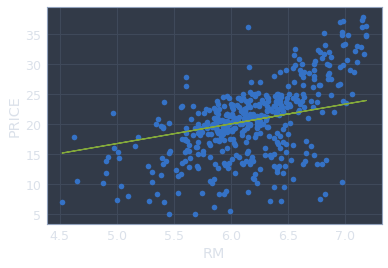

In [16]:
def compute_error(b,m,x,y):
    totalError = 0
    #Two ways to implement this
    #first way
    for i in range(0,len(x)):
        totalError += (y[i]-(m*x[i]+b))**2

    return totalError/float(len(x))

def optimizer(x, y, starting_b,starting_m,learning_rate,num_iter):
    b = starting_b
    m = starting_m

    #gradient descent 梯度下降法
    for i in range(num_iter):
        #update b and m with the new more accurate b and m by performing
        # thie gradient step
        b,m =compute_gradient(b, m, x, y, learning_rate)
        if i%100==0:
            print 'iter {0}:error={1}'.format(i,compute_error(b,m,x,y))
    return [b,m]

def compute_gradient(b_current, m_current, x, y, learning_rate):

    b_gradient = 0
    m_gradient = 0

    N = float(len(x))
    #Two ways to implement this
    #first way
    for i in range(0,len(x)):
        #computing partial derivations of our error function    
        m_gradient += -(2/N) * x[i] * (y[i]-((m_current*x[i])+b_current))
        b_gradient += -(2/N)*(y[i]-((m_current*x[i])+b_current))

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]


def plot_data(x,y,b,m):

    #plottting
    y_predict = m*x+b
    plt.plot(x,y,'o')
    plt.plot(x,y_predict,'g-')
    plt.xlabel('RM')
    plt.ylabel('PRICE')
    plt.show()


def Linear_regression():
    #define hyperparamters
    #learning_rate is used for update gradient
    #defint the number that will iteration
    # define  y =mx+b
    learning_rate = 0.001
    initial_b = 0.0
    initial_m = 0.0
    num_iter = 500

    #train model
    #print b m error
    print 'initial variables:\n initial_b = {0}\n intial_m = {1}\n error of begin = {2} \n'.format(initial_b,initial_m,compute_error(initial_b,initial_m,x,y))

    #optimizing b and m
    [b ,m] = optimizer(x,y,initial_b,initial_m,learning_rate,num_iter)

    #print final b m error
    print 'final formula parmaters:\n b = {1}\n m={2}\n error of end = {3} \n'.format(num_iter,b,m,compute_error(b,m,x,y))

    #plot result
    plot_data(x,y,b,m)

if __name__ =='__main__':
    Linear_regression()


## 利用sklearn实现多元线性回归

In [17]:
#切割数据样本集合测试集 80%训练数据，20%的测试数据
X_train,x_test,y_train,y_true = train_test_split(train,target,test_size=0.2)

> 一个模型需要测试数据去评价，通过测试数据可以知道一个模型在独立数据集上的表现；同时测试数据还能用来检验过拟合以及欠拟合。利用测试集对训练出来的模型进行验证，可以提高模型的泛化能力。关于为什么要把训练集和测试集分为80% / 20%，在网上找了很多解释似乎都指向了玄学范畴，但是我个人理解的是，太少的训练集合会导致数据极度容易过拟合，而且小的训练集合里面会包含不少噪音，这就很难弄出复杂度稍微高一点的模型；而过多的训练集则会很难准确验证模型的泛化能力。玄学方案一般采用$\frac 2 3 到 \frac 4 5$的数据作为训练集。

## 创建学习模型

In [18]:
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
elastic = ElasticNet()

## 训练模型

In [19]:
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
decision.fit(X_train,y_train)
elastic.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## 预测数据

In [20]:
y_pre_linear = linear.predict(x_test)
y_pre_ridge = ridge.predict(x_test)
y_pre_lasso = lasso.predict(x_test)
y_pre_decision = decision.predict(x_test)
y_pre_elastic = elastic.predict(x_test)

## 评分(按降序)

linear_score = 0.70829213386
ridge_score = 0.70745379606
lasso_score = 0.663703598155
decision_score = 0.830797438687
elastic_score = 0.665308665965



<BarContainer object of 5 artists>

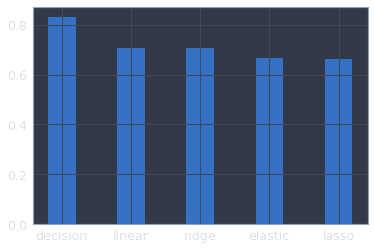

In [21]:
#knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
elastic_score=r2_score(y_true,y_pre_elastic)
#svr_score=r2_score(y_true,y_pre_svr)
# display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)
print "linear_score = %s\nridge_score = %s\nlasso_score = %s\ndecision_score = %s\nelastic_score = %s\n"%(linear_score,ridge_score,lasso_score,decision_score,elastic_score)
method = ['linear','ridge','lasso','decision','elastic']
score = [linear_score, ridge_score, lasso_score, decision_score, elastic_score]
s = pd.DataFrame(data=score,index=method)
ss = s.sort_values(by=0,ascending=False)
fig = plt.figure()  
plt.bar(ss.index, ss[0], 0.4)  

## 可视化

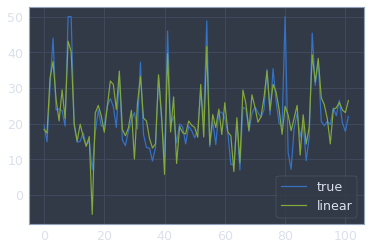

In [22]:
# Linear
plt.plot(y_true,label='true')
plt.plot(y_pre_linear,label='linear')
plt.legend()

# Ridge
# plt.plot(y_true,label='true')
# plt.plot(y_pre_ridge,label='ridge')
# plt.legend()

# lasso
# plt.plot(y_true,label='true')
# plt.plot(y_pre_lasso,label='lasso')
# plt.legend()

# decision
# plt.plot(y_true,label='true')
# plt.plot(y_pre_decision,label='decision')
# plt.legend()